In [45]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, v_measure_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import sqlite3
import warnings
warnings.filterwarnings("ignore")

In [32]:
iris=pd.read_csv('dataset/iris/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
conn=sqlite3.connect('dataset/iris/database.sqlite')
c=conn.cursor()
c.execute("SELECT * FROM Iris")
df=c.fetchall()

In [4]:
# Drop the Id column
iris = iris.drop('Id',axis =1)

In [34]:
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

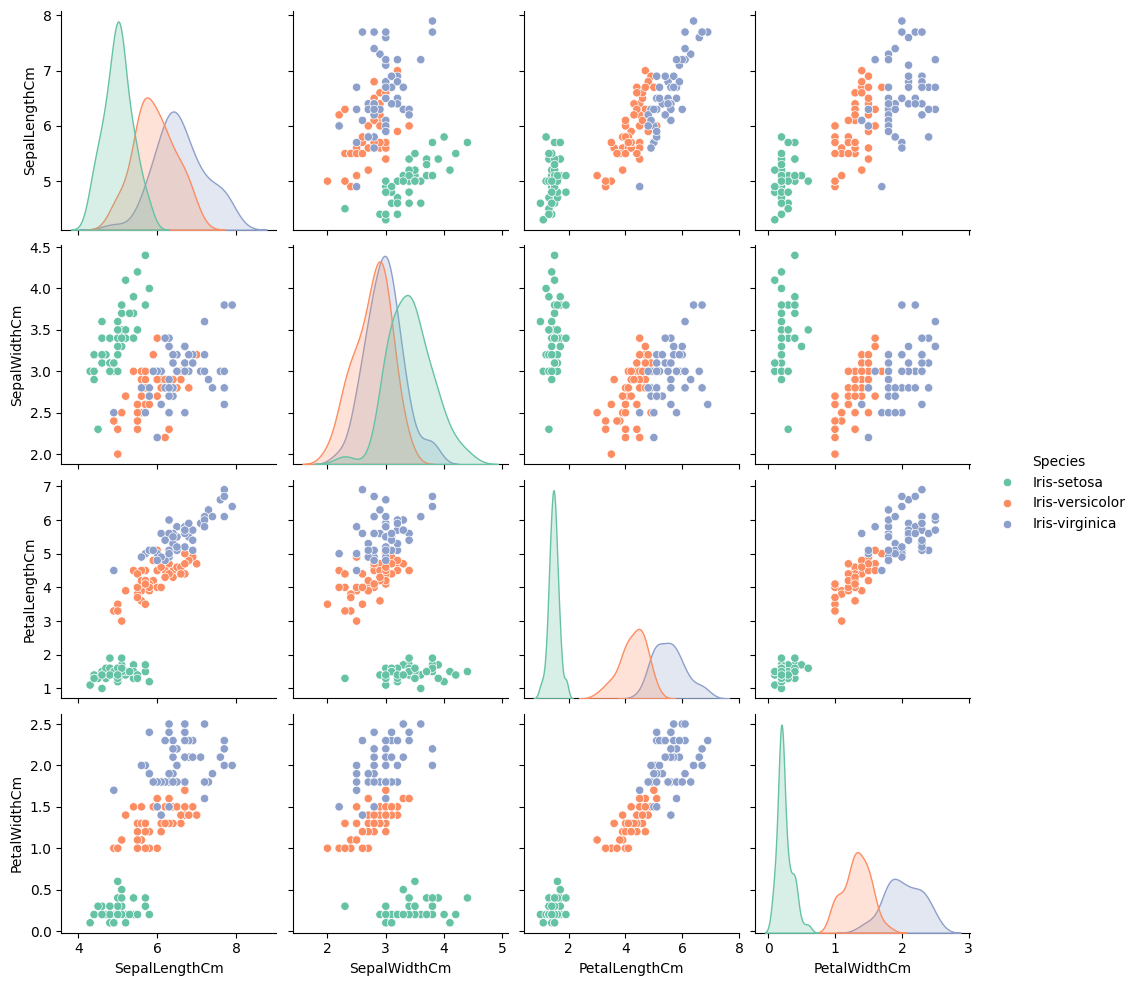

In [5]:
# ploting the pairplot of the iris dataset
sns.pairplot(iris, hue='Species', palette='Set2');

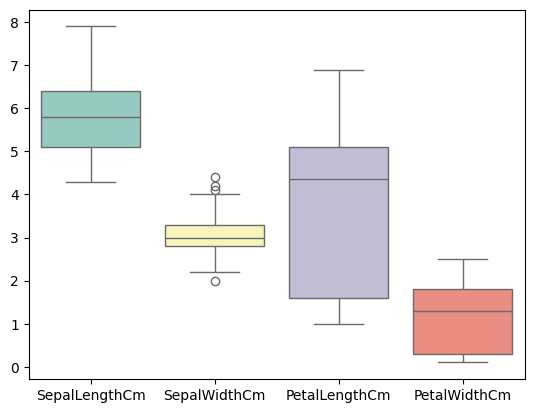

In [6]:
sns.boxplot(data=iris, palette='Set3');

Text(0, 0.5, 'Measurement (cm)')

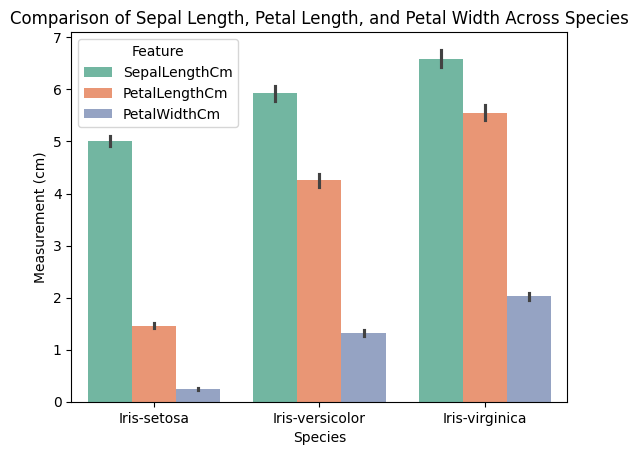

In [7]:
# here we are using melt function to convert the data into long format
iris_melted = iris.melt(id_vars='Species', value_vars=['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm'], 
var_name='Feature', value_name='Measurement')
sns.barplot(x='Species', y='Measurement', hue='Feature', data=iris_melted, palette='Set2')
plt.title('Comparison of Sepal Length, Petal Length, and Petal Width Across Species')
plt.xlabel('Species')
plt.ylabel('Measurement (cm)')

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
y = iris.pop('Species')
x = iris

In [10]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [11]:
# PCA to reduce the dimensionality of the data
from sklearn.decomposition import PCA  
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

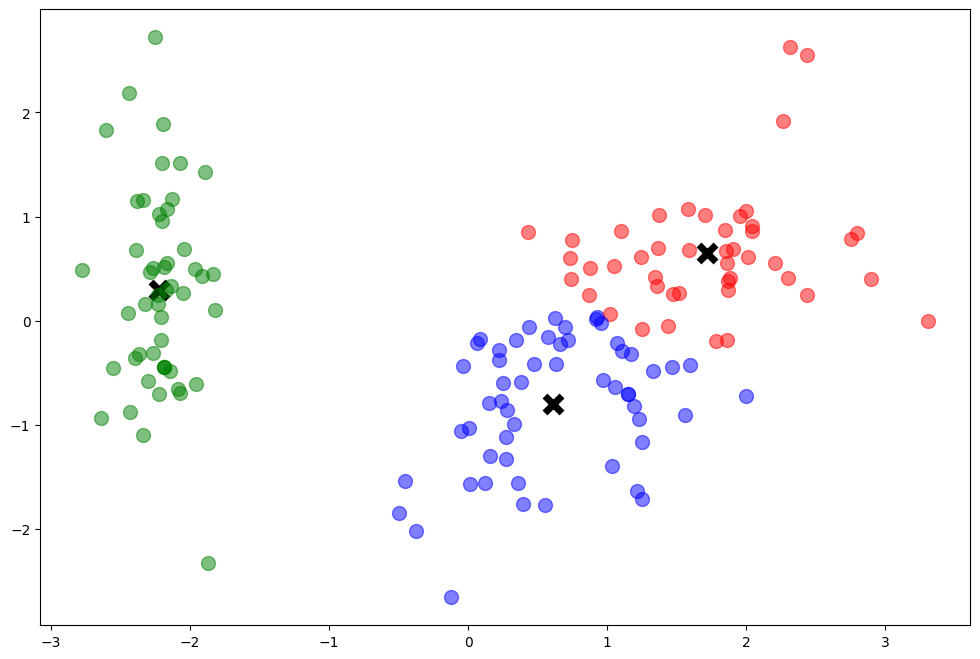

In [14]:
# KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

colors = ["g.", "r.", "b."]
plt.figure(figsize=(12,8))
for i in range(len(X_pca)):
    plt.plot(X_pca[i][0], X_pca[i][1], colors[labels[i]], markersize=20, alpha = 0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=150, linewidths=5, color='black')

In [15]:
silhouette = silhouette_score(X_pca, labels)

In [16]:
calinski_harabasz = calinski_harabasz_score(X_pca, labels)

In [17]:
davies_bouldin = davies_bouldin_score(X_pca, labels)

In [18]:
ari = adjusted_rand_score(y, labels)

In [24]:
ami = adjusted_mutual_info_score(y, labels)

In [25]:
v_measure = v_measure_score(y, labels)

In [26]:
print(f"Number of clusters: {len(np.unique(labels))}")
print("\nInternal Evaluation Metrics:")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print("\nExternal Evaluation Metrics:")
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Adjusted Mutual Information: {ami:.4f}")
print(f"V-measure: {v_measure:.4f}")

Number of clusters: 3

Internal Evaluation Metrics:
Silhouette Score: 0.5104
Calinski-Harabasz Index: 289.9492
Davies-Bouldin Index: 0.7102

External Evaluation Metrics:
Adjusted Rand Index: 0.6011
Adjusted Mutual Information: 0.6435
V-measure: 0.6479


In [38]:
# Ensure iris is a DataFrame
if isinstance(iris, list):
    iris = pd.DataFrame(iris, columns=['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'])

y = iris['Species']
x = iris.drop(columns=['Species'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22, train_size=0.70)


In [39]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

0.9777777777777777

In [47]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0